In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [2]:
# helper function, used for abortion_sex() and abortion_rel()
def percentage_mean_max(df, quantity):
    """
    doc:
    """
    
    df["percentage"] = df["counts"]/quantity
    percentage_arr = df["percentage"].to_numpy()
    mean = df["counts"].to_numpy()@df["response to abortion"].to_numpy()/quantity
    maxval = df["response to abortion"].to_numpy()[df["counts"].to_numpy().argmax()]
    
    return df,percentage_arr, mean, maxval

In [3]:
def tidy_abortion_df():
    """
    Create dataframe with variables relevant for all hypotheses concerning abortion
    """
    
    # load data
    df = pd.read_stata('data/data.dta', convert_categoricals = False)
    # choose relevant columns / variables  
    abortion_df = df[["sex", "age", "J005", "rd01", "J029"]]
    # remove all values below 0 of abortion response, as negative values indicate not apllicable
    abortion_df = abortion_df[(abortion_df.J005 > 0)]
    # rename columns
    abortion_df = abortion_df. rename(columns = {"J005": "response to abortion", "rd01": "denomination", "J029": "religious assessment"})
    # rename values 
    abortion_df = abortion_df.replace({"sex": {1: "male", 2: "female"},
                                      "denomination": {1: "protestant church (w.o. free church)", 2: "protestant church", 3: "roman catholic church", 4: "other christian religious group", 5: "other non christian religious group", 6: "no religious group", -9: np.nan, -7: np.nan},
                                      "religious assessment": {1: "deeply religious", 2: "very religious", 3: "rather religious", 4: "neither nor", 5: "rather not religious", 6: "not religious", 7: "not religious at all", -13: np.nan, -12: np.nan, -9: np.nan, -8: np.nan}})  
    
    return abortion_df

In [4]:
def tidy_abortion_summary():
    
    print('\033[1m' + 'Summary:' + '\033[0m')
    print("\nFull Dataframe: \n\n", tidy_abortion_df())
    # summary statistic
    print("\nSummary statistic: \n\n", tidy_abortion_df().describe(include='all'))   
    
    return 

In [5]:
# test still missing
def abortion_sex():
    """
    Check for correlation between sex and response to abortion by counting responses
    of males and females and plotting the percentage
    """
    
    print("\n" + '\033[1m' + 'Hypothesis 1: Is there any relation between the response concerning abortion and sex?' + '\033[0m')
    
    # choosing relevant columns
    abortion_df = tidy_abortion_df()
    abse_df = abortion_df[["sex", "response to abortion"]]
        
    # group_by
    abse_group_df = abse_df.groupby(["sex","response to abortion"]).value_counts().reset_index()
    abse_group_df = abse_group_df.rename(columns = {0:"counts"})
    
    # get counts of how many males and how many females 
    quantity = abse_df["sex"].value_counts()
    quantity_males = np.asarray(quantity)[0]
    quantity_females = np.asarray(quantity)[1]
    
    # split df for males and females 
    females_df = abse_group_df[:4]
    males_df = abse_group_df[4:]
    
    values = males_df["response to abortion"].to_numpy()
    
    # use function to get percentage, mean and max values respectively 
    females_df, females_percentage, mean_female_response, max_female_response = percentage_mean_max(females_df, quantity_females)
    males_df, males_percentage, mean_male_response, max_male_response = percentage_mean_max(males_df, quantity_males)

    # add percentage to grouped df
    abse_group_df = pd.concat([females_df, males_df])
    print("\n Grouped Dataframe: \n\n",abse_group_df, "\n")
    
    # summary df with mean and max response
    zipped = list(zip(set(abse_df["sex"].to_numpy()), [mean_male_response, mean_female_response], [max_male_response, max_female_response]))
    summary_df = pd.DataFrame(zipped, columns = ["Age", "Mean Response", "Max Response"])
    print("\nSummary:\n\n",summary_df)
    
    # line plot for response to abortion of males and females in percentage 
    plt.plot(values, males_percentage, 'o-g')
    plt.plot(values, females_percentage, 'o-b')
    plt.legend(['males', 'females'])
    plt.title("Response to abortion depending on sex in percentage\n")
    plt.xlabel("Response to abortion in numeric values")
    plt.ylabel("percentage")
    plt.xticks(ticks=values, labels=values)
    plt.show()
    
    return 

In [6]:
# Fehlt: test
# Idee: plot mit shared x axis anstat zwei plots komplett individuell 
# könnte man noch machen: die dfs zusammen führen als eins 
# könnte man noch machen: age bins und nochmal alles 
def abortion_age():
    """
    doc:
    """
    
    print("\n" + '\033[1m' + 'Hypothesis 2: Is there a any relation between the response to abortion and the age?' + '\033[0m')
    
    # choose relevant columns and remove rows containing nans
    abortion_df = tidy_abortion_df()
    abag_df = abortion_df[["age", "response to abortion"]]
    abag_df = abag_df.dropna()
    
    # grouped df
    abag_group_df = abag_df.groupby(["age","response to abortion"]).value_counts().reset_index()
    abag_group_df = abag_group_df.rename(columns = {0:"counts"})
    print("\nGrouped Dataframe:\n\n",abag_group_df)
    
    # get mean and max response to abortion from each age group
    counts = abag_group_df['counts'].to_numpy()
    ages = abag_group_df['age'].to_numpy()
    values = abag_group_df['response to abortion'].to_numpy()
    
    individual_ages = set(ages)
    mean_values = []
    max_values = []
    
    for element in individual_ages:
        inter = 0
        counter = 0
        mval = 0
        m = 0
        for i,val in enumerate(ages):
            if val == element:
                inter += values[i]*counts[i]
                counter += counts[i]
                
                if counts[i] > mval:
                    mval = counts[i]
                    m = values[i]
                
        mean_values.append(inter/counter)
        max_values.append(m)
    
    # summary df containing each age group and the mean and max response to abortion
    zipped = list(zip(individual_ages, mean_values, max_values))
    summary_df = pd.DataFrame(zipped, columns = ["Age", "Mean Response", "Max Response"])
    print("\nSummary:\n\n",summary_df)    
    
    # scatterplots for mean and max response
    plt.scatter(list(individual_ages), mean_values)
    plt.title("Mean response to abortion of every age")
    plt.xlabel("ages")
    plt.ylabel("numeric response to abortion")
    plt.show()
    plt.scatter(list(individual_ages), max_values)
    plt.title("Max response to abortion of every age")
    plt.xlabel("ages")
    plt.ylabel("numeric response to abortion")
    plt.yticks(list(set(max_values)), list(set(max_values)) )
    plt.show()
    
    return 

In [9]:
def abortion_rel():
    """
    doc:
    """
    
    print("\n" + '\033[1m' + 'Hypothesis 3: Is there any relation between the response to abortion and christian religious assessment?' + '\033[0m')
    
    # choose relevant columns and drop nan rows 
    abortion_df = tidy_abortion_df()
    abre_df = abortion_df[["response to abortion", "denomination", "religious assessment"]]
    abre_df = abre_df.dropna()
    # also drop rows on two other conditions
    abre_df = abre_df[(abre_df["denomination"] != "other non christian religious group") & (abre_df["religious assessment"] != "neither nor" )]
    
    # merge some values 
    abre_df["religious assessment"] = abre_df["religious assessment"].replace(["deeply religious", "very religious", "rather religious"],"religious").replace(["rather not religious", "not religious", "not religious at all"], "not religious")
    abre_df["denomination"] = abre_df["denomination"].replace(["protestant church (w.o. free church)", "protestant church", "roman catholic church", "other christian religious group"],"christian")
    
    # drop combination of religious self assessment and no religious denomination
    index_names = abre_df[(abre_df["religious assessment"] == "religious") & (abre_df["denomination"] == "no religious group")].index
    abre_df.drop(index_names, inplace = True)
    
    # groupby
    abre_group_df = abre_df[["religious assessment", "response to abortion"]].groupby(["religious assessment", "response to abortion"]).value_counts().reset_index()
    abre_group_df = abre_group_df.rename(columns = {0:"counts"})   
    
    # get amount of religious and not religious people
    quantity = abre_df["religious assessment"].value_counts()
    quantity_nr = np.asarray(quantity)[0]
    quantity_r = np.asarray(quantity)[1]
    
    # split df into two for religious and not religious respectively
    nr_df = abre_group_df[:4]
    r_df = abre_group_df[4:]
    
    # response values (1 to 4)
    values = nr_df["response to abortion"].to_numpy()
    
    # use function to get percentage, mean and max response respectively
    nr_df, nr_percentage, mean_nr_response, max_nr_response = percentage_mean_max(nr_df, quantity_nr)
    r_df, r_percentage, mean_r_response, max_r_response = percentage_mean_max(r_df, quantity_r)
    
    # add percentage to grouped df
    abre_group_df = pd.concat([nr_df, r_df])
    print("\nGrouped Dataframe:\n\n",abre_group_df)
    
    # summray df with mean and max repsonse
    zipped = list(zip(set(abre_df["religious assessment"].to_numpy()), [mean_r_response, mean_nr_response], [max_r_response, max_nr_response]))
    summary_df = pd.DataFrame(zipped, columns = ["Religiousness", "Mean Response", "Max Response"])
    print("\nSummary:\n\n",summary_df)
    
    # line plot 
    plt.plot(values, nr_percentage, 'o-g')
    plt.plot(values, r_percentage, 'o-b')
    plt.legend(['not religious', 'religious'])
    plt.title("Response to abortion depending on religious self assessemnt in percentage\n")
    plt.xlabel("Response to abortion in numeric values")
    plt.ylabel("percentage")
    plt.xticks(ticks=values, labels=values)
    plt.show()
    
    return 
    

Summary:

Full Dataframe: 

          sex  age  response to abortion                          denomination  \
1     female   64                     4                    no religious group   
5       male   41                     1  protestant church (w.o. free church)   
10      male   37                     4                    no religious group   
11    female   77                     3                 roman catholic church   
13      male   46                     4                    no religious group   
...      ...  ...                   ...                                   ...   
3467  female   60                     3  protestant church (w.o. free church)   
3468  female   69                     4                    no religious group   
3471  female   43                     1                    no religious group   
3472  female   32                     1                    no religious group   
3476    male   88                     3                    no religious group   

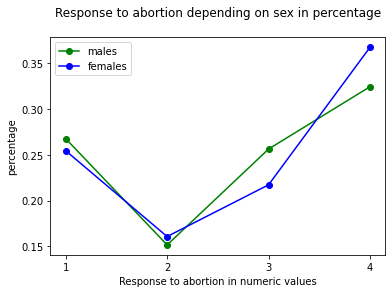


Hypothesis 2: Is there a any relation between the response to abortion and the age?

Grouped Dataframe:

      age  response to abortion  counts
0     18                     1       1
1     18                     3       6
2     18                     4       8
3     19                     1       6
4     19                     2       2
..   ...                   ...     ...
278   89                     2       1
279   90                     3       1
280   92                     2       2
281   92                     3       2
282   94                     4       1

[283 rows x 3 columns]

Summary:

     Age  Mean Response  Max Response
0    18       3.400000             4
1    19       2.631579             4
2    20       2.312500             1
3    21       3.000000             4
4    22       2.333333             1
..  ...            ...           ...
70   88       2.600000             1
71   89       1.333333             1
72   90       3.000000             3
73   92       2.500

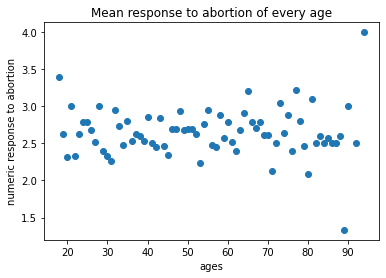

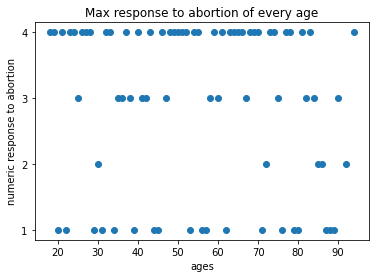


Hypothesis 3: Is there any relation between the response to abortion and christian religious assessment?

Grouped Dataframe:

   religious assessment  response to abortion  counts  percentage
0        not religious                     1     167    0.201205
1        not religious                     2      94    0.113253
2        not religious                     3     189    0.227711
3        not religious                     4     380    0.457831
4            religious                     1     150    0.349650
5            religious                     2      98    0.228438
6            religious                     3     100    0.233100
7            religious                     4      81    0.188811

Summary:

    Religiousness  Mean Response  Max Response
0      religious       2.261072             1
1  not religious       2.942169             4


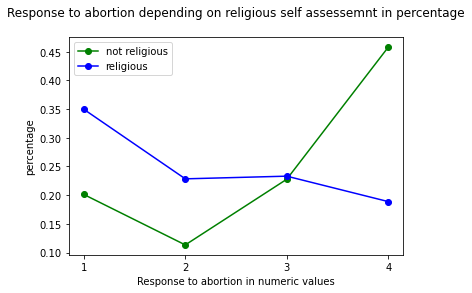

In [10]:
tidy_abortion_summary()
abortion_sex()
abortion_age()
abortion_rel()